In [371]:
# Dependencies
import requests
import json
import pandas as pd
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
from config import bea_key
import numpy as np

In [352]:
##################################################################
## Define function to build different API calls
##################################################################

def api_url_builder(api_geo, api_codes, api_years):

    base_url = "https://apps.bea.gov/api/data/?&method=GetData&DataSetName=Regional&TableName=SAPCE3&ResultFormat=JSON"
    api_key = bea_key
    geo_fips = f"&GeoFips={api_geo}"
    line_code = f"&LineCode={api_codes}"
    api_years = f"&year={api_years}"
    
    api_url = f"{base_url}{geo_fips}{line_code}{api_years}&UserID={api_key}"
    
    return api_url



# Looking at Major Category Spend across US

In [353]:

# Ping API for US data for all linecodes from 2017-2021
url = api_url_builder('00000','ALL','2017,2018,2019,2020,2021')

# Get JSON response
response = requests.get(url).json()


In [355]:
# Set up lists to hold response data
geo = []
desc = []
year = []
spend = []
line_code = []

response_list = response["BEAAPI"]["Results"]["Data"]

for each in response_list:
    geo.append(each["GeoName"])
    desc.append(each["Description"])
    year.append(each["TimePeriod"])
    
    # Change spend from string to number and remove commas
    spend_value = (each["DataValue"].replace(",",""))
    spend.append(float(spend_value))
    
    
    # Split the code into prefix and return just line number for filtering
    code = (each["Code"]).split("-")
    line_code.append(code[1])

In [356]:
# create a data frame from info
spend_dict = {
    "Code": line_code,
    "State": geo,
    "Year": year,
    "Desc": desc,
    "Spend": spend    
}

spend_data = pd.DataFrame(spend_dict)

spend_data.sort_values('Code')



,Code,State,Year,Desc,Spend
464,1,United States,2021,Personal consumption expenditures,15902575.3
352,1,United States,2020,Personal consumption expenditures,14116165.7
240,1,United States,2019,Personal consumption expenditures,14392721.0
128,1,United States,2018,Personal consumption expenditures,13904979.5
16,1,United States,2017,Personal consumption expenditures,13233608.6
...,...,...,...,...,...
553,99,United States,2021,Internet access,81499.3
329,99,United States,2019,Internet access,73984.2
441,99,United States,2020,Internet access,76360.3
105,99,United States,2017,Internet access,72460.4


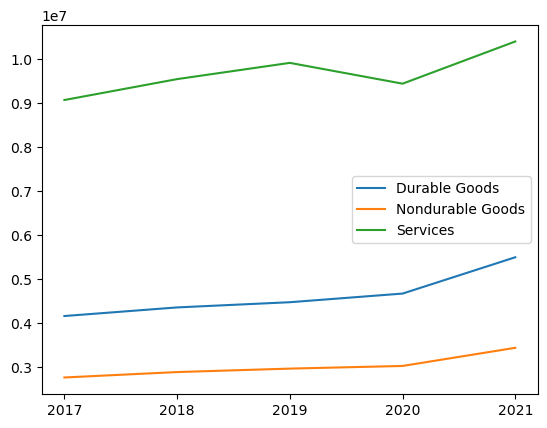

In [7]:
durable_goods = spend_data.loc[spend_data['Code']=='2']
nondurable_goods = spend_data.loc[spend_data['Code']=='25']
services = spend_data.loc[spend_data['Code']=='47']


x_axis1 = durable_goods['Year']
y_axis1 = durable_goods['Spend']

x_axis2 = nondurable_goods['Year']
y_axis2 = nondurable_goods['Spend']

x_axis3 = services['Year']
y_axis3 = services['Spend']


plt.plot(x_axis1, y_axis1, label="Durable Goods")
plt.plot(x_axis2, y_axis2, label="Nondurable Goods")
plt.plot(x_axis3, y_axis3, label="Services")
plt.legend(loc="best")
plt.show()


# Consumer Good Spend by Region

In [8]:
######################################
## Create a list of Regions
######################################

regions = ['New England', 'Mideast', 'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain', 'Far West']




![Map of Regions](https://www.mdpi.com/economies/economies-09-00159/article_deploy/html/images/economies-09-00159-g001.png "Map of Regions")


In [9]:
## Get info for Regions


# Ping API for US data for all linecodes from 2017-2021
url = api_url_builder('STATE','2','2017,2018,2019,2020,2021')

# Get JSON response
response = requests.get(url).json()

# Set up lists to hold response data
geo = []
year = []
spend = []
line_code = []

response_list = response["BEAAPI"]["Results"]["Data"]

for each in response_list:
    geo.append(each["GeoName"])
    year.append(each["TimePeriod"])
    
    # Change spend from string to number and remove commas
    spend_value = (each["DataValue"].replace(",",""))
    spend.append(float(spend_value))
    
    
    # Split the code into prefix and return just line number for filtering
    code = (each["Code"]).split("-")
    line_code.append(code[1])

In [10]:
# create a data frame from info
spend_dict = {
    "Year": year,
    "Code": line_code,
    "State": geo,
    "Spend": spend    
}

spend_data = pd.DataFrame(spend_dict)

#spend_data.sort_values('Year')


# Sorting by column 'Country'
spend_data = spend_data.sort_values(by=['Year'])


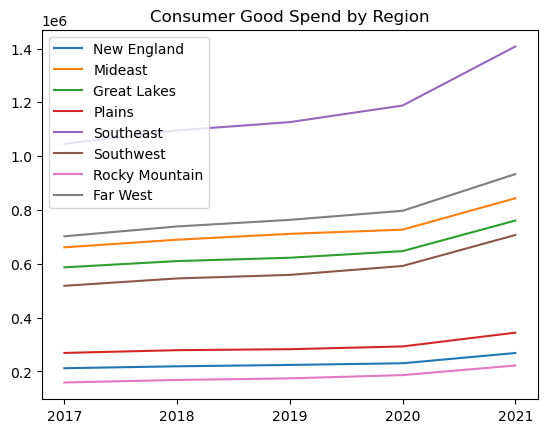

In [11]:
######################################
## Plot Durable Goods by Region
######################################


for region in regions:
    x_axis = spend_data.loc[spend_data['State']==region]['Year']
    y_axis = spend_data.loc[spend_data['State']==region]['Spend']
    plt.plot(x_axis, y_axis, label=region)

    
plt.title("Consumer Good Spend by Region")    
plt.legend(loc="upper left")
plt.show()

# Nondurable Good Spend by Region

In [12]:
## Get info for Regions


# Ping API for US data for all linecodes from 2017-2021
url = api_url_builder('STATE','26','2017,2018,2019,2020,2021')

# Get JSON response
response = requests.get(url).json()

# Set up lists to hold response data
geo = []
year = []
spend = []
line_code = []

response_list = response["BEAAPI"]["Results"]["Data"]

for each in response_list:
    geo.append(each["GeoName"])
    year.append(each["TimePeriod"])
    
    # Change spend from string to number and remove commas
    spend_value = (each["DataValue"].replace(",",""))
    spend.append(float(spend_value))
    
    
    # Split the code into prefix and return just line number for filtering
    code = (each["Code"]).split("-")
    line_code.append(code[1])

In [13]:
# create a data frame from info
spend_dict = {
    "Year": year,
    "Code": line_code,
    "State": geo,
    "Spend": spend    
}

spend_data = pd.DataFrame(spend_dict)

#spend_data.sort_values('Year')


# Sorting by column 'Country'
spend_data = spend_data.sort_values(by=['Year'])

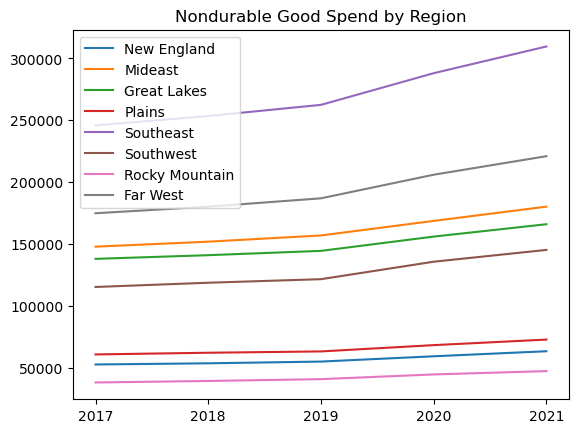

In [14]:
######################################
## Plot Nondurable Goods by Region
######################################


for region in regions:
    x_axis = spend_data.loc[spend_data['State']==region]['Year']
    y_axis = spend_data.loc[spend_data['State']==region]['Spend']
    plt1 = plt.plot(x_axis, y_axis, label=region)

    
plt.title("Nondurable Good Spend by Region")    
plt.legend(loc="upper left")
plt.show()

# Service Spend by Region

In [15]:
## Get info for Regions


# Ping API for US data for all linecodes from 2017-2021
url = api_url_builder('STATE','47','2017,2018,2019,2020,2021')

# Get JSON response
response = requests.get(url).json()

# Set up lists to hold response data
geo = []
year = []
spend = []
line_code = []

response_list = response["BEAAPI"]["Results"]["Data"]

for each in response_list:
    geo.append(each["GeoName"])
    year.append(each["TimePeriod"])
    
    # Change spend from string to number and remove commas
    spend_value = (each["DataValue"].replace(",",""))
    spend.append(float(spend_value))
    
    
    # Split the code into prefix and return just line number for filtering
    code = (each["Code"]).split("-")
    line_code.append(code[1])
    

In [16]:
# create a data frame from info
spend_dict = {
    "Year": year,
    "Code": line_code,
    "State": geo,
    "Spend": spend    
}

spend_data = pd.DataFrame(spend_dict)

#spend_data.sort_values('Year')


# Sorting by column 'Country'
spend_data = spend_data.sort_values(by=['Year'])


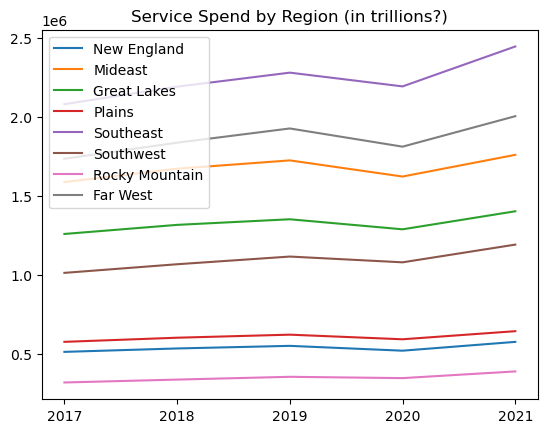

In [17]:
######################################
## Plot Services Spend by Region
######################################


for region in regions:
    x_axis = spend_data.loc[spend_data['State']==region]['Year']
    y_axis = spend_data.loc[spend_data['State']==region]['Spend']
    plt.plot(x_axis, y_axis, label=region)


    
plt.title("Service Spend by Region (in trillions?)")    
plt.legend(loc="upper left")
plt.show()

# Examining Travel

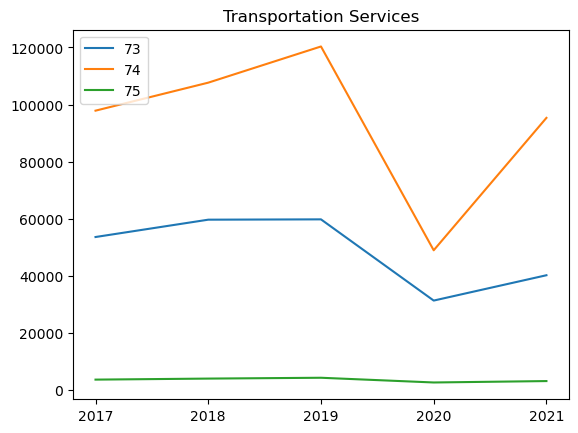

,Year,Desc,Spend
1,2017,Air transportation,97849.5
4,2018,Air transportation,107668.4
7,2019,Air transportation,120352.5
10,2020,Air transportation,48901.8
13,2021,Air transportation,95322.4


In [24]:
######################################
## Plot Public Transportation by Category
######################################

codes = ['73','74','75'] #73 = Ground, #74 = Air, #75 = Water

for code in codes:
    x_axis = spend_data.loc[spend_data['Code']==code]['Year']
    y_axis = spend_data.loc[spend_data['Code']==code]['Spend']
    plt.plot(x_axis, y_axis, label=code)


    
plt.title("Transportation Services")    
plt.legend(loc="upper left")
plt.show()

spend_data = spend_data.loc[spend_data['Code'].isin(codes)]

spend_data_table = spend_data[['Year','Desc','Spend']].reset_index(drop=True)

spend_data_table.loc[spend_data_table['Desc']=='Water transportation ']
spend_data_table.loc[spend_data_table['Desc']=='Ground transportation ']
spend_data_table.loc[spend_data_table['Desc']=='Air transportation ']

# Alcohol Sales

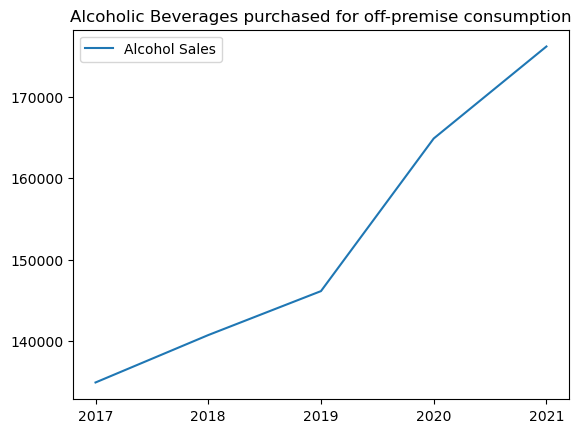

In [32]:
######################################
## Plot Alcohol Sales
######################################

codes = ['28']

for code in codes:
    x_axis = spend_data.loc[spend_data['Code']==code]['Year']
    y_axis = spend_data.loc[spend_data['Code']==code]['Spend']
    plt.plot(x_axis, y_axis, label="Alcohol Sales")


    
plt.title("Alcoholic Beverages purchased for off-premise consumption")    
plt.legend(loc="upper left")
plt.xlabel = ("Years")
plt.ylabel = ("Sales in Millions ($)")
plt.show()



In [33]:
## Get info for Regions


# Ping API for US data for all linecodes from 2017-2021
url = api_url_builder('STATE','28','2017,2018,2019,2020,2021')

# Get JSON response
response = requests.get(url).json()

# Set up lists to hold response data
geo = []
year = []
spend = []
line_code = []

response_list = response["BEAAPI"]["Results"]["Data"]

for each in response_list:
    geo.append(each["GeoName"])
    year.append(each["TimePeriod"])
    
    # Change spend from string to number and remove commas
    spend_value = (each["DataValue"].replace(",",""))
    spend.append(float(spend_value))
    
    
    # Split the code into prefix and return just line number for filtering
    code = (each["Code"]).split("-")
    line_code.append(code[1])

In [153]:
# create a data frame from info
spend_dict = {
    "Year": year,
    "Code": line_code,
    "State": geo,
    "Spend": spend    
}

spend_data = pd.DataFrame(spend_dict)

#spend_data.sort_values('Year')


# Sorting by column 'Country'
alcohol_sales = spend_data.sort_values(by=['Year'])

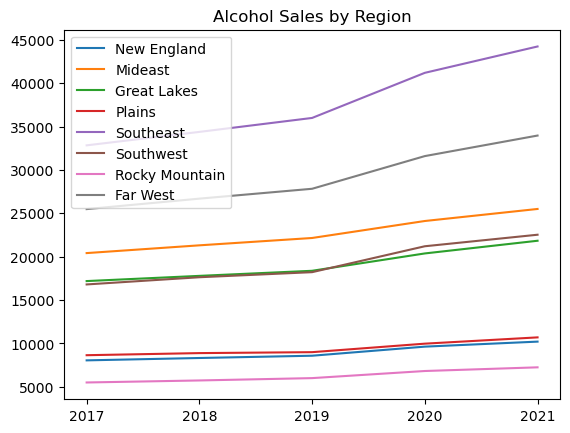

In [138]:
######################################
## Plot Alcohol Spend by Region
######################################


for region in regions:
    x_axis = alcohol_sales.loc[alcohol_sales['State']==region]['Year']
    y_axis = alcohol_sales.loc[alcohol_sales['State']==region]['Spend']
    plt.plot(x_axis, y_axis, label=region)


    
plt.title("Alcohol Sales by Region")    
plt.legend(loc="upper left")
plt.show()

In [154]:

alcohol_sales = alcohol_sales.loc[alcohol_sales['State'].isin(regions)]
alcohol_sales = alcohol_sales.pivot(index='State', columns='Year', values='Spend')

change_in_spend = []
region_name = []

for region in regions:
    change = (((alcohol_sales.loc[region]['2021']) - (alcohol_sales.loc[region]['2019'])) / alcohol_sales.loc[region]['2019']) * 100
    change_in_spend.append(change)
    region_name.append(region)

    
region_spend_dict = {
    'Region':region_name,
    'Change (%)':change_in_spend
}

region_spend = pd.DataFrame(region_spend_dict)

region_spend.sort_values('Change (%)', ascending=False)

,Region,Change (%)
5,Southwest,23.688039
4,Southeast,22.885835
7,Far West,22.045405
6,Rocky Mountain,20.701486
3,Plains,18.947193
0,New England,18.933464
2,Great Lakes,18.840075
1,Mideast,15.100864


# US Spend by sub-categories

For this, we wll look at a variety of subcategories within the larger categories of durable goods, nondurable goods and services. Codes for the categories observed will be in the comments for each section.

In [389]:
######################################
## Create DF to pull groups from 
## Data not from API, from CSV
######################################

consumer_spend_bycat = pd.read_csv('ConsumerSpend/US_consumer_spend_change.csv')

# Create df from load
consumer_spend_bycat_df = pd.DataFrame(consumer_spend_bycat)
consumer_spend_bycat_df = consumer_spend_bycat_df[['LineCode', 'Description','2019-2020','2020-2021']]
consumer_spend_bycat_df = consumer_spend_bycat_df.set_index(consumer_spend_bycat_df['LineCode'], drop=True)
consumer_spend_bycat_df = consumer_spend_bycat_df.drop(['LineCode'], axis=1)

consumer_spend_bycat_df = consumer_spend_bycat_df.astype({'2019-2020':'float', '2020-2021':'float'})

consumer_spend_bycat_df.head()



,Description,2019-2020,2020-2021
LineCode,,,
1,Personal consumption expenditures,-1.9,12.7
2,Goods,4.4,17.7
3,Durable goods,9.0,25.1
4,Motor vehicles and parts,3.3,29.0
5,New motor vehicles,2.5,20.0


## Spend in Durable Good Sub-Categories

In [390]:
######################################
## Durable Goods Spend by subcategories
## Line codes - 5,6,9,10,14,15,21,24
## Data not from API, from CSV
######################################

durable_goods_codes = [4,5,8,9,13,14,20,23]


durable_goods_df = consumer_spend_bycat_df.iloc[durable_goods_codes]

covid_low = durable_goods_df['2019-2020'].min()
covid_cat_low = durable_goods_df.loc[durable_goods_df['2019-2020'] == covid_low]


covid_high = durable_goods_df['2019-2020'].max()
covid_cat_high = durable_goods_df.loc[durable_goods_df['2019-2020'] == covid_high]


recovery_low = durable_goods_df['2020-2021'].min()
recovery_cat_low = durable_goods_df.loc[durable_goods_df['2020-2021'] == recovery_low]

recovery_high = durable_goods_df['2020-2021'].max()
recovery_cat_high = durable_goods_df.loc[durable_goods_df['2020-2021'] == recovery_high]


print("----------------------------------------------------------------")
print("2020 Covid Impact")
print(f"{covid_cat_low['Description'].item()} dropped the most during Covid by {covid_low}% YoY")
print(f"{covid_cat_high['Description'].item()} gained the most during Covid by {covid_high}% YoY")
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("2021 Covid Recovery")
print(f"{recovery_cat_low['Description'].item()} recovered the least by {recovery_low}% YoY")
print(f"{recovery_cat_high['Description'].item()} recovered the most by {recovery_high}% YoY")
print("----------------------------------------------------------------")


durable_goods_df

----------------------------------------------------------------
2020 Covid Impact
        Telephone and related communication equipment dropped the most during Covid by -16.9% YoY
        Sporting equipment, supplies, guns, and ammunition gained the most during Covid by 27.7% YoY
----------------------------------------------------------------
----------------------------------------------------------------
2021 Covid Recovery
        Household appliances recovered the least by 17.6% YoY
        Net purchases of used motor vehicles recovered the most by 50.6% YoY
----------------------------------------------------------------


,Description,2019-2020,2020-2021
LineCode,,,
5,New motor vehicles,2.5,20.0
6,Net purchases of used motor vehicles,5.0,50.6
9,Furniture and furnishings,16.6,21.8
10,Household appliances,10.1,17.6
14,"Video, audio, photographic, and inform...",18.6,19.9
15,"Sporting equipment, supplies, guns, an...",27.7,23.0
21,Therapeutic appliances and equipment,-1.7,21.8
24,Telephone and related communication eq...,-16.9,21.3


## Spend in Nondurable Good Sub-Categories

In [391]:
######################################
## Nondurable Goods Spend by subcategories
## Line codes - 27,28,32,33, 40, 43, 44
## Data not from API, from CSV
######################################

non_durable_goods_codes = [26,27,31,32,29,42,43]


non_durable_goods_df = consumer_spend_bycat_df.iloc[non_durable_goods_codes]

covid_low = non_durable_goods_df['2019-2020'].min()
covid_cat_low = non_durable_goods_df.loc[non_durable_goods_df['2019-2020'] == covid_low]


covid_high = non_durable_goods_df['2019-2020'].max()
covid_cat_high = non_durable_goods_df.loc[non_durable_goods_df['2019-2020'] == covid_high]


recovery_low = non_durable_goods_df['2020-2021'].min()
recovery_cat_low = non_durable_goods_df.loc[non_durable_goods_df['2020-2021'] == recovery_low]

recovery_high = non_durable_goods_df['2020-2021'].max()
recovery_cat_high = non_durable_goods_df.loc[non_durable_goods_df['2020-2021'] == recovery_high]


print("----------------------------------------------------------------")
print("2020 Covid Impact")
print(f"{covid_cat_low['Description'].item()} dropped the most during Covid by {covid_low}% YoY")
print(f"{covid_cat_high['Description'].item()} gained the most during Covid by {covid_high}% YoY")
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("2021 Covid Recovery")
print(f"{recovery_cat_low['Description'].item()} recovered the least by {recovery_low}% YoY")
print(f"{recovery_cat_high['Description'].item()} recovered the most by {recovery_high}% YoY")
print("----------------------------------------------------------------")


non_durable_goods_df

----------------------------------------------------------------
2020 Covid Impact
          Women's and girls' clothing dropped the most during Covid by -11.4% YoY
        Alcoholic beverages purchased for off-premises consumption gained the most during Covid by 12.8% YoY
----------------------------------------------------------------
----------------------------------------------------------------
2021 Covid Recovery
        Tobacco recovered the least by 3.5% YoY
          Women's and girls' clothing recovered the most by 29.4% YoY
----------------------------------------------------------------


,Description,2019-2020,2020-2021
LineCode,,,
27,Food and nonalcoholic beverages purcha...,8.7,7.0
28,Alcoholic beverages purchased for off-...,12.8,6.9
32,Women's and girls' clothing,-11.4,29.4
33,Men's and boys' clothing,-9.9,28.9
30,Clothing and footwear,-9.9,28.7
43,Personal care products,3.7,14.8
44,Tobacco,3.7,3.5


## Spend in Services Sub-Categories

In [394]:
######################################
## Service Spend by subcategories
## Line codes - 56,57,61,62,63,77,79,97,99
## Data not from API, from CSV
######################################

services_codes = [55,56,60,61,62,76,78,96,98]


services_df = consumer_spend_bycat_df.iloc[services_codes]

covid_low = services_df['2019-2020'].min()
covid_cat_low = services_df.loc[services_df['2019-2020'] == covid_low]


covid_high = services_df['2019-2020'].max()
covid_cat_high = services_df.loc[services_df['2019-2020'] == covid_high]


recovery_low = services_df['2020-2021'].min()
recovery_cat_low = services_df.loc[services_df['2020-2021'] == recovery_low]

recovery_high = services_df['2020-2021'].max()
recovery_cat_high = services_df.loc[services_df['2020-2021'] == recovery_high]


print("----------------------------------------------------------------")
print("2020 Covid Impact")
print(f"{covid_cat_low['Description'].item()} dropped the most during Covid by {covid_low}% YoY")
print(f"{covid_cat_high['Description'].item()} gained the most during Covid by {covid_high}% YoY")
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("2021 Covid Recovery")
print(f"{recovery_cat_low['Description'].item()} recovered the least by {recovery_low}% YoY")
print(f"{recovery_cat_high['Description'].item()} recovered the most by {recovery_high}% YoY")
print("----------------------------------------------------------------")


services_df

----------------------------------------------------------------
2020 Covid Impact
        Membership clubs, sports centers, parks, theaters, and museums dropped the most during Covid by -47.3% YoY
          Internet access gained the most during Covid by 3.2% YoY
----------------------------------------------------------------
----------------------------------------------------------------
2021 Covid Recovery
          Water supply and sanitation recovered the least by 5.1% YoY
        Gambling recovered the most by 37.3% YoY
----------------------------------------------------------------


,Description,2019-2020,2020-2021
LineCode,,,
56,Water supply and sanitation,0.1,5.1
57,Electricity and gas,0.3,7.5
61,Outpatient services,-5.0,10.0
62,Physician services,-4.8,9.1
63,Dental services,-16.5,14.4
77,"Membership clubs, sports centers, park...",-47.3,23.9
79,Gambling,-21.2,37.3
97,Telecommunication services,-0.6,6.6
99,Internet access,3.2,6.7


## Spend in Travel Sub-Categories

In [398]:
######################################
## Travel Spend by subcategories
## Line codes - 73,74,75,109,110
## Data not from API, from CSV
######################################

travel_codes = [72,73,74,107,108]


travel_df = consumer_spend_bycat_df.iloc[travel_codes]

covid_low = travel_df['2019-2020'].min()
covid_cat_low = travel_df.loc[travel_df['2019-2020'] == covid_low]


covid_high = travel_df['2019-2020'].max()
covid_cat_high = travel_df.loc[travel_df['2019-2020'] == covid_high]


recovery_low = travel_df['2020-2021'].min()
recovery_cat_low = travel_df.loc[travel_df['2020-2021'] == recovery_low]

recovery_high = travel_df['2020-2021'].max()
recovery_cat_high = travel_df.loc[travel_df['2020-2021'] == recovery_high]


print("----------------------------------------------------------------")
print("2020 Covid Impact")
print(f"{covid_cat_low['Description'].item()} dropped the most during Covid by {covid_low}% YoY")
print(f"{covid_cat_high['Description'].item()} gained the most during Covid by {covid_high}% YoY")
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("2021 Covid Recovery")
print(f"{recovery_cat_low['Description'].item()} recovered the least by {recovery_low}% YoY")
print(f"{recovery_cat_high['Description'].item()} recovered the most by {recovery_high}% YoY")
print("----------------------------------------------------------------")


travel_df

----------------------------------------------------------------
2020 Covid Impact
          Foreign travel by U.S. residents dropped the most during Covid by -71.8% YoY
          Water transportation gained the most during Covid by -39.3% YoY
----------------------------------------------------------------
----------------------------------------------------------------
2021 Covid Recovery
          Less: Expenditures in the United States by nonresidents recovered the least by -2.8% YoY
          Air transportation recovered the most by 94.9% YoY
----------------------------------------------------------------


,Description,2019-2020,2020-2021
LineCode,,,
73,Ground transportation,-47.7,28.4
74,Air transportation,-59.4,94.9
75,Water transportation,-39.3,19.3
109,Foreign travel by U.S. residents,-71.8,69.1
110,Less: Expenditures in the United Sta...,-63.1,-2.8
